In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('titanic.csv')
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [3]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [4]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [5]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [6]:
df = pd.get_dummies(df, prefix='',prefix_sep='')
df.head()

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [7]:
df.drop(['male'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [8]:
X = df.drop(['Survived'], axis=1)

In [9]:
y = df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

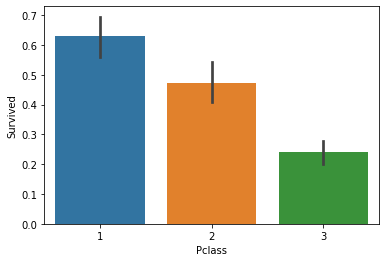

In [11]:
sns.barplot(x=df.Pclass, y= df.Survived, data=df)

From above plot we can infer that passengers from higher classes survived compared to lower class passengers

<AxesSubplot:xlabel='female', ylabel='Survived'>

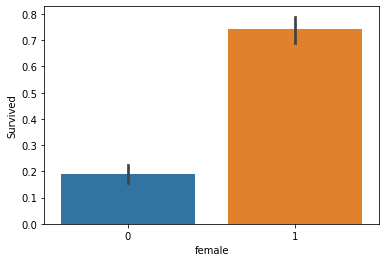

In [12]:
sns.barplot(x=df['female'], y= df.Survived, data=df)

the percentage of female passengers is greater compared to male passengers who survived

In [13]:
model = DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions = model.predict(X_test)

In [16]:
accuracy_score(y_test, predictions)

0.8324022346368715